Game review dataset comes from the follow

git clone https://github.com/ThaWeatherman/scrapers.git

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [34]:
# loading the dataset
games = pd.read_csv("games.csv")

In [35]:
# Print the names of the games
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


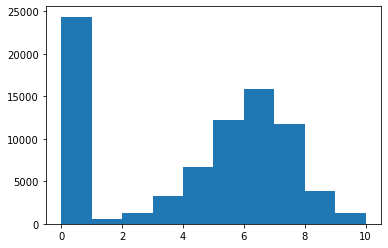

In [36]:
# make a histogram of average rating colums
plt.hist(games["average_rating"])
plt.show()

In [37]:
# Print the first rows of the all rows with zero scores
print(games[games["average_rating"] == 0].iloc[0])

# Print the first rows of the all rows with greater than zero scores
print(games[games["average_rating"] > 0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [38]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


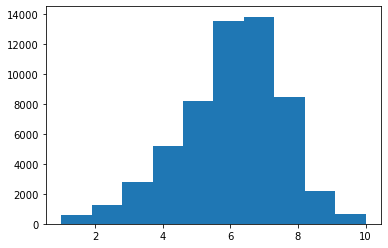

In [39]:
# removing any rows with no reviews
games = games[games["users_rated"] > 0]

# removing any rows with negative years
# games = games[games["yearpublished"] >0]
# remove rows with missing data
games = games.dropna(axis=0)

# make a histogram of average rating colums
plt.hist(games["average_rating"])
plt.show()

In [40]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000
mean,64092.223943,1874.793089,2.004834,5.572837,59.921503,57.457184,59.921503,7.591556,231.360477,6.016113,1.654372,374.507470,13.166432,18.002689,60.579024,70.344219,23.548722,1.269716
std,57513.253779,486.032042,0.791475,50.773395,406.451917,393.197450,406.451917,4.869533,1364.124459,1.578830,2.646445,1787.003768,46.984706,71.984315,284.161400,338.375579,138.053005,1.213841
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16133.250000,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,36921.000000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,118558.750000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.040000,5.488240,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,184260.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [25]:
# columns = games.columns.to_list()
# columns

70        True
865      False
917       True
1581     False
1728     False
         ...  
80844    False
80845    False
81025    False
81067    False
81162    False
Name: yearpublished, Length: 3497, dtype: bool

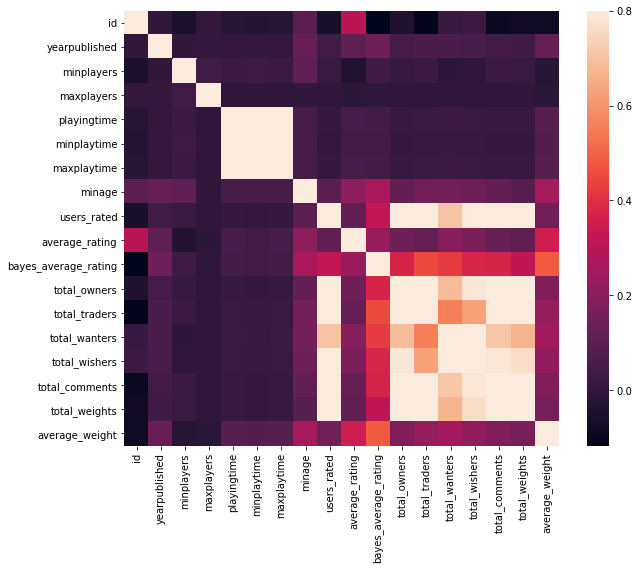

In [41]:
# Correlation matrix
cormat = games.corr()
fig = plt.figure(figsize= (10, 8))

sns.heatmap(cormat, vmax = 0.8, square= True)
plt.show()

In [47]:
# Preprosessing the data
columns = games.columns.to_list()

# Filter the columns we don't want
columns = [c for c in columns if c not in ["average_rating", "bayes_average_rating", "id", "type", "name"]]

target = "average_rating"

In [44]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000
mean,64092.223943,1874.793089,2.004834,5.572837,59.921503,57.457184,59.921503,7.591556,231.360477,6.016113,1.654372,374.507470,13.166432,18.002689,60.579024,70.344219,23.548722,1.269716
std,57513.253779,486.032042,0.791475,50.773395,406.451917,393.197450,406.451917,4.869533,1364.124459,1.578830,2.646445,1787.003768,46.984706,71.984315,284.161400,338.375579,138.053005,1.213841
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16133.250000,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,36921.000000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,118558.750000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.040000,5.488240,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,184260.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [55]:
# spliting the dataset into training and testing
X = games[columns]
y = games[target]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [56]:
print(len(columns))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

15
(45515, 15)
(11379, 15)
(45515,)
(11379,)


In [60]:
# importing the linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# fit the model
LR.fit(X_train, y_train)

LinearRegression()

In [62]:
# Generate our predictions for the test set.
predictions = LR.predict(X_test)

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, y_test)

2.0878654278597413

In [64]:
# importing the random forest model
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators= 100, min_samples_leaf= 10, random_state= 1)

RFR.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [65]:
# Generate our predictions for the test set.
predictions = RFR.predict(X_test)

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, y_test)

1.4575588917181705